<a href="https://colab.research.google.com/github/ntanhhh/Time_Series/blob/main/vietocr_gettingstart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Introduction
<p align="center">
<img src="https://raw.githubusercontent.com/pbcquoc/vietocr/master/image/vietocr.jpg" width="512" height="512">
</p>
This notebook describe how you can use VietOcr to train OCR model




In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install vietocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 21.0 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray-einstats 0.9.0 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
pymc 5.23.0 requires numpy>=1.25.0, but you have numpy 1.24.4 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.


# Inference

In [1]:
import matplotlib.pyplot as plt
from PIL import Image

from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg

In [2]:
config = Cfg.load_config_from_name('vgg_transformer')

Change weights to your weights or using default weights from our pretrained model. Path can be url or local file

In [3]:
config['weights'] = '/content/drive/MyDrive/vgg_transformer.pth'
config['cnn']['pretrained']=False
config['device'] = 'cuda:0'

In [4]:
detector = Predictor(config)

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


In [5]:
# prompt: lấy file data_line từ drive và giải nén như ! wget https://vocr.vn/data/vietocr/sample.zip
# ! unzip  -qq -o sample.zip

!cp /content/drive/MyDrive/data_line.zip .
!unzip -qq -o data_line.zip

In [6]:
! ls data_line | shuf |head -n 5

images
train_annotation.txt
test_annotation.txt


'TRẦN MINH LUÂN'

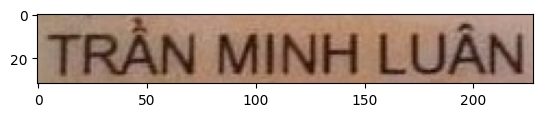

In [7]:
img = '/content/data_line/images/00cddf83-c1eb-4fc3-a1ed-68c2d6cae965_jpg.rf.876e01e3dce93267d49e72ad145b33ec_0.jpg'
img = Image.open(img)
plt.imshow(img)
s = detector.predict(img)
s

# Download sample dataset

In [ ]:
! wget https://vocr.vn/data/vietocr/data_line.zip

--2022-12-07 14:28:11--  https://vocr.vn/data/vietocr/data_line.zip
Resolving vocr.vn (vocr.vn)... 128.199.222.116
Connecting to vocr.vn (vocr.vn)|128.199.222.116|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61212284 (58M) [application/zip]
Saving to: ‘data_line.zip’

data_line.zip       100%[===================>]  58.38M  12.9MB/s    in 5.6s    

2022-12-07 14:28:18 (10.5 MB/s) - ‘data_line.zip’ saved [61212284/61212284]



In [ ]:
! unzip -qq -o ./data_line.zip

# Train model



1.   Load your config
2.   Train model using your dataset above



Load the default config, we adopt VGG for image feature extraction

In [8]:
from vietocr.tool.config import Cfg
from vietocr.model.trainer import Trainer

# Change the config

* *data_root*: the folder save your all images
* *train_annotation*: path to train annotation
* *valid_annotation*: path to valid annotation
* *print_every*: show train loss at every n steps
* *valid_every*: show validation loss at every n steps
* *iters*: number of iteration to train your model
* *export*: export weights to folder that you can use for inference
* *metrics*: number of sample in validation annotation you use for computing full_sequence_accuracy, for large dataset it will take too long, then you can reuduce this number


In [9]:
config = Cfg.load_config_from_name('vgg_transformer')

In [10]:

dataset_params = {
    'name':'hw',
    'data_root':'./data_line/',
    'train_annotation':'train_annotation.txt',
    'valid_annotation':'test_annotation.txt'
}

params = {
         'print_every':200,
         'valid_every':15*200,
          'iters':20000,
          'checkpoint':'./checkpoint/transformerocr_checkpoint.pth',
          'export':'./weights/transformerocr.pth',
          'metrics': 10000
         }

config['trainer'].update(params)
config['dataset'].update(dataset_params)
config['device'] = 'cuda:0'

you can change any of these params in this full list below

In [11]:
config

{'vocab': 'aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ ',
 'device': 'cuda:0',
 'seq_modeling': 'transformer',
 'transformer': {'d_model': 256,
  'nhead': 8,
  'num_encoder_layers': 6,
  'num_decoder_layers': 6,
  'dim_feedforward': 2048,
  'max_seq_length': 1024,
  'pos_dropout': 0.1,
  'trans_dropout': 0.1},
 'optimizer': {'max_lr': 0.0003, 'pct_start': 0.1},
 'trainer': {'batch_size': 32,
  'print_every': 200,
  'valid_every': 3000,
  'iters': 20000,
  'export': './weights/transformerocr.pth',
  'checkpoint': './checkpoint/transformerocr_checkpoint.pth',
  'log': './train.log',
  'metrics': 10000},
 'dataset': {'name': 'hw',
  'data_root': './data_line/',
  'train_annotation': 'train_annotation.txt',
  'valid_annotation': 'test_annotation.txt',
  'image_height': 32,
  'image_min_width': 32,
  'image

You should train model from our pretrained

In [12]:
trainer = Trainer(config, pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth
100%|██████████| 548M/548M [00:08<00:00, 68.3MB/s]
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
18533it [00:12, 1505.77it/s]
Create train_hw: 100%|████████████████████████████████████████| 5981/5981 [00:00<00:00, 9408.65it/s]

Remove 1 invalid images
Created dataset with 5979 samples



train_hw build cluster: 100%|███████████████████████████████| 5979/5979 [00:00<00:00, 158682.74it/s]
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Create valid_hw: 100%|█████████████████████████████████████████| 370/370 [00:00<00:00, 10036.56it/s]

Created dataset with 369 samples



valid_hw build cluster: 100%|██████████████████████████████████| 369/369 [00:00<00:00, 87475.17it/s]


Save model configuration for inference, load_config_from_file

In [13]:
trainer.config.save('config.yml')

Visualize your dataset to check data augmentation is appropriate

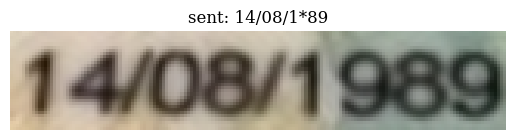

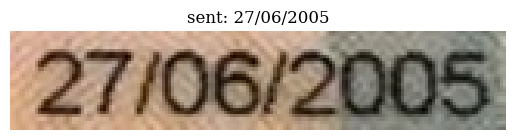

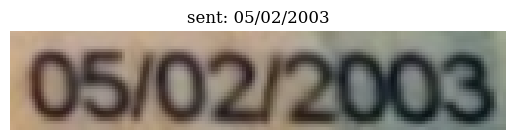

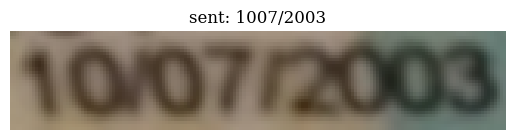

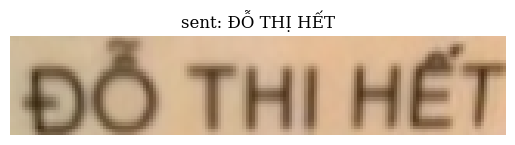

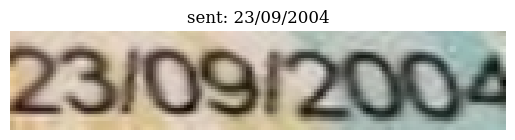

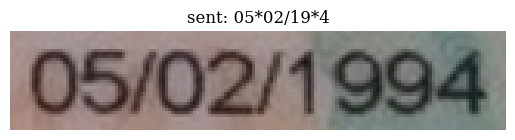

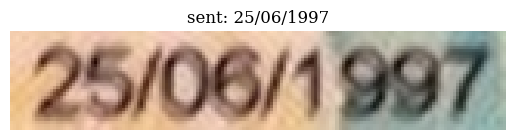

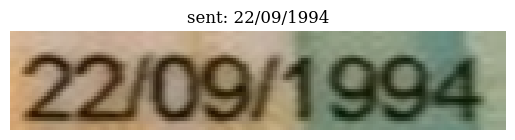

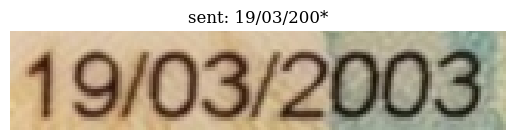

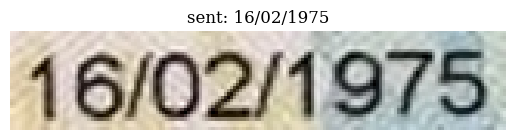

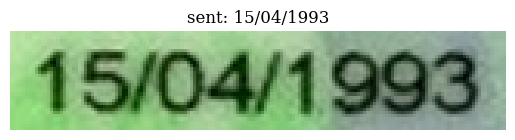

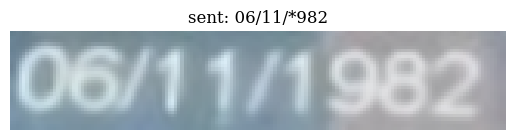

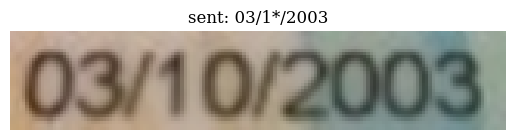

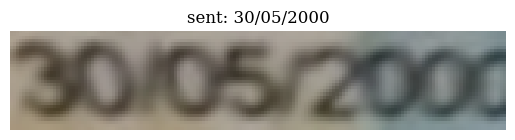

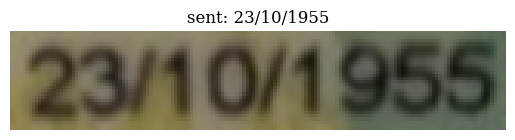

In [14]:
trainer.visualize_dataset()

Train now

In [15]:
trainer.train()

iter: 000200 - train loss: 0.783 - lr: 1.91e-05 - load time: 0.72 - gpu time: 52.23
iter: 000400 - train loss: 0.735 - lr: 3.95e-05 - load time: 0.69 - gpu time: 54.33
iter: 000600 - train loss: 0.724 - lr: 7.14e-05 - load time: 0.63 - gpu time: 51.78
iter: 000800 - train loss: 0.722 - lr: 1.12e-04 - load time: 0.62 - gpu time: 52.90
iter: 001000 - train loss: 0.721 - lr: 1.56e-04 - load time: 0.91 - gpu time: 52.53
iter: 001200 - train loss: 0.719 - lr: 2.01e-04 - load time: 0.69 - gpu time: 53.99
iter: 001400 - train loss: 0.720 - lr: 2.41e-04 - load time: 0.58 - gpu time: 49.63
iter: 001600 - train loss: 0.725 - lr: 2.73e-04 - load time: 0.55 - gpu time: 53.47
iter: 001800 - train loss: 0.722 - lr: 2.93e-04 - load time: 0.92 - gpu time: 50.89
iter: 002000 - train loss: 0.723 - lr: 3.00e-04 - load time: 0.74 - gpu time: 53.63
iter: 002200 - train loss: 0.716 - lr: 3.00e-04 - load time: 0.51 - gpu time: 51.31
iter: 002400 - train loss: 0.719 - lr: 3.00e-04 - load time: 0.45 - gpu time

Visualize prediction from our trained model


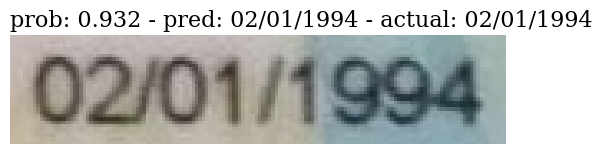

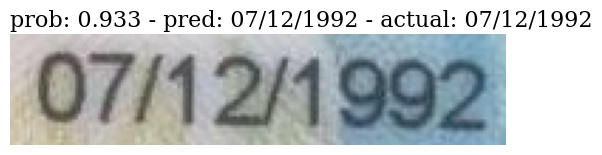

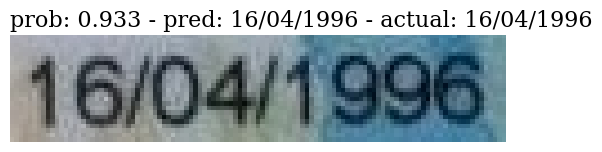

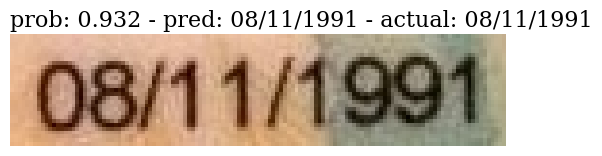

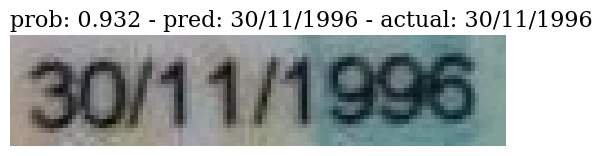

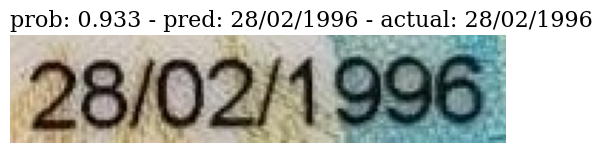

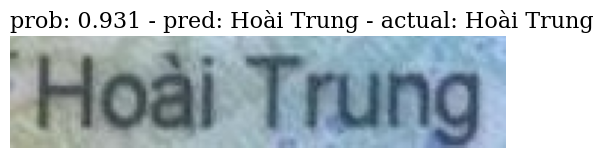

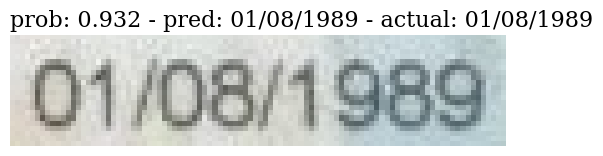

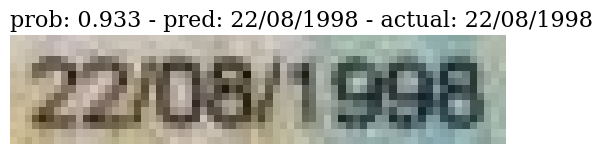

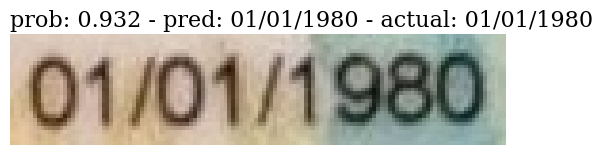

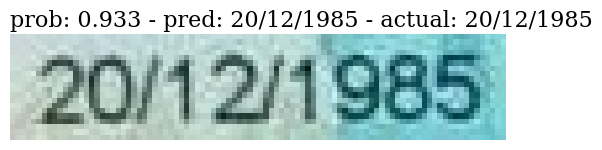

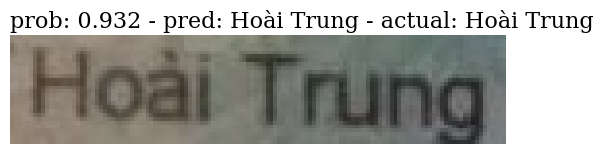

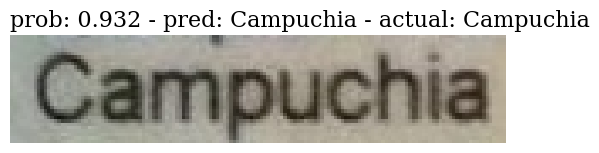

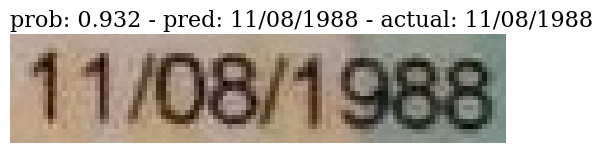

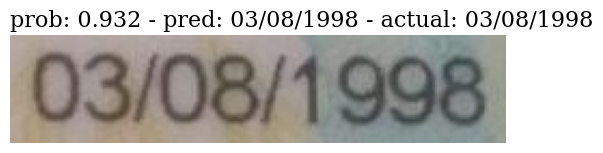

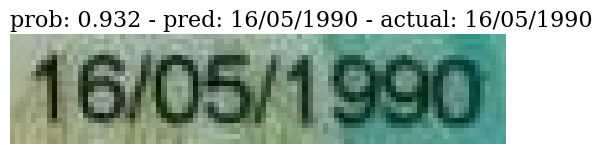

In [16]:
trainer.visualize_prediction()

Compute full seq accuracy for full valid dataset

In [17]:
trainer.precision()

(0.953125, 0.98387784)

In [23]:
from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg

config = Cfg.load_config_from_file('/content/config.yml') # sử dụng config của các bạn được export lúc train nếu đã thay đổi tham số
#config = Cfg.load_config_from_name('vgg_transformer') # sử dụng config mặc định của mình
config['weights'] = '/content/weights/transformerocr.pth' # đường dẫn đến trọng số đã huấn luyện hoặc comment để sử dụng pretrained model của mình
config['device'] = 'cuda:0' # device chạy 'cuda:0', 'cuda:1', 'cpu'

detector = Predictor(config)

img = '/content/data_line/images/00e884f6-ebc30306-c6be-4bd8-98cb-3a8c6065549f_jpg.rf.74f1fa2235d615c2d7d593ff94439f75_6.jpg'
img = Image.open(img)
# dự đoán
s = detector.predict(img, return_prob=True) # muốn trả về xác suất của câu dự đoán thì đổi return_prob=True
print(s)

('Nam Ngạn, TP Thanh Hóa, Thanh Hóa', 0.9307516524285981)


In [2]:
# Uninstall and reinstall vietocr with specific dependency versions to force compatibility
! pip uninstall -y vietocr
! pip install vietocr==0.3.13 numpy==1.24.4 scipy==1.10.1 imgaug==0.4.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 4.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of scikit-image to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 109.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.0/948.0 kB 64.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.9/133.9 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 101.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.8/297.8 kB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 98.1 MB/s eta 0:00:00
  Created wheel for gdown: filename=